## 一、前言

该模型为Kaggle上经典的风控模型：[Give Me Some Credit](https://www.kaggle.com/c/GiveMeSomeCredit),数据包括了25万条个人财务情况的样本数据，通过对于该数据集的学习，构建一个信用卡评分模型，以期望对新用户预测其违约风险。

### 1.1 行业知识简介

信用评分模型的书：[陈建的《信用评分模型与应用》](https://pan.baidu.com/s/1980a4)

风控模型：先说分类，本文评分卡模型属于**A卡申请者评级模型**


信用风险计量体系包括主体评级模型和债项评级两部分。主体评级和债项评级均有一系列评级模型组成，其中主体评级模型可用“四张卡”来表示，分别是A卡、B卡、C卡和F卡；债项评级模型通常按照主体的融资用途，分为企业融资模型、现金流融资模型和项目融资模型等。


**A卡，又称为申请者评级模型**，个人用户申请相应的金融产品，对用户进行筛选分类，区分好坏用户，据此决定是否通过申请。在获客过程中用到的信用风险模型。从模型的角度来看，它会对用户未来一定周期内的逾期风险作预测，即模型会在用户授权的情况下收集用户多维度的信息，以此来预测逾期概率。预测的逾期概率被用于风控策略或者转换成信用评分，比如国外经典的FICO评分，国内的蚂蚁信用评分、京东小白评分、携程金融的程信分等。A卡评分除了用于决定是否通过用户的信用申请，还用于风险定价，比如额度、利率等


**B卡，又称为行为评级模型**，在用户使用金融产品的过程中，根据用户的历史使用的行为数据对用户进行评级，对可能出现的逾期、延期等行为进行预测。用户拿到信用额度后，模型根据用户的贷中行为数据，进行风险水平的预测。本质上讲，这个模型是一个事件驱动的模型，在互联网金融领域，一般会比A卡的预测时间窗口要短，对用户的行为更为敏感。B卡除了可以用于高风险用户的拦截，也可以作为额度、利率调整的重要参考因素。


**C卡，又称为催收评级模型**，对业务中的存量客户是否需要催收进行预测。例如当用户出现逾期时，机构应该先催谁，或者哪些用户不用催，就自动会把钱还回来。催收模型一定程度节约催收成本，提高回催率。


**F卡，又称为欺诈评级模型**，对业务中的新用户可能存在的欺诈行为进行预测。根据用户提交的材料进行身份核实，确保用户不存在欺诈行为；

风控建模所使用的客户数据主要分为：(1)信贷数据,(2)资质数据,(3)消费数据,(4)行为数据。

![替代文字](credit-1.png)


以及风控中的常用模型：
![替代文字](1-4.jpg)

### 1.2 项目流程
信用风险评级模型的主要开发流程如下：

（1） 数据获取，包括获取存量客户及潜在客户的数据。存量客户是指已经在证券公司开展相关融资类业务的客户，包括个人客户和机构客户；潜在客户是指未来拟在证券公司开展相关融资类业务的客户，主要包括机构客户，这也是解决证券业样本较少的常用方法，这些潜在机构客户包括上市公司、公开发行债券的发债主体、新三板上市公司、区域股权交易中心挂牌公司、非标融资机构等。

（2） 数据预处理，主要工作包括数据清洗、缺失值处理、异常值处理，主要是为了将获取的原始数据转化为可用作模型开发的格式化数据。

（3） 探索性数据分析，该步骤主要是获取样本总体的大概情况，描述样本总体情况的指标主要有直方图、箱形图等。

（4） 变量选择，该步骤主要是通过统计学的方法，筛选出对违约状态影响最显著的指标。主要有单变量特征选择方法和基于机器学习模型的方法 。

（5） 模型开发，该步骤主要包括变量分段、变量的WOE（证据权重）变换和逻辑回归估算三部分。

（6） 模型评估，该步骤主要是评估模型的区分能力、预测能力、稳定性，并形成模型评估报告，得出模型是否可以使用的结论。

（7） 信用评分，根据逻辑回归的系数和WOE等确定信用评分的方法。将Logistic模型转换为标准评分的形式。

（8） 建立评分系统，根据信用评分方法，建立自动信用评分系统。

PS：有些时候为了便于命名，相应的变量用标号代替

## 二、项目详情

### 2.1 数据获取

#### 2.1.1 读取数据

In [229]:
#导入包
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

#导入数据
train=pd.read_csv("datasets/GiveMeSomeCredit/cs-training.csv")  #训练集
test=pd.read_csv("datasets/GiveMeSomeCredit/cs-test.csv")       #测试集

#了解数据集
train.info() #给出样本数据的相关信息概览
train.head() #查看前5行数据

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


数据来自Kaggle的Give Me Some Credit，训练集有15万条的样本数据，大致情况如下：
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Variable Name</th>
      <th>Description</th>
      <th>Type</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>SeriousDlqin2yrs（目标值）</td>
      <td>是否有超过90天或更长时间逾期未还的不良行为</td>
      <td>Y/N（0为好1为坏）</td>
    </tr>
    <tr>
      <th>2</th>
      <td>RevolvingUtilizationOfUnsecuredLines</td>
      <td>可用额度比值</td>
      <td>percentage</td>
    </tr>
    <tr>
      <th>3</th>
      <td>age</td>
      <td>年龄</td>
      <td>integer</td>
    </tr>
    <tr>
      <th>4</th>
      <td>NumberOfTime30-59DaysPastDueNotWorse</td>
      <td>逾期30-59天笔数</td>
      <td>integer</td>
    </tr>
    <tr>
      <th>5</th>
      <td>DebtRatio</td>
      <td>还款率(每月偿还债务，赡养费，生活费用).</td>
      <td>percentage</td>
    </tr>
    <tr>
      <th>6</th>
      <td>MonthlyIncome</td>
      <td>月收入</td>
      <td>real</td>
    </tr>
    <tr>
      <th>7</th>
      <td>NumberOfOpenCreditLinesAndLoans</td>
      <td>信贷数量</td>
      <td>integer</td>
    </tr>
    <tr>
      <th>8</th>
      <td>NumberOfTimes90DaysLate</td>
      <td>逾期90天笔数</td>
      <td>integer</td>
    </tr>
    <tr>
      <th>9</th>
      <td>NumberRealEstateLoansOrLines</td>
      <td>固定资产贷款量</td>
      <td>integer</td>
    </tr>
    <tr>
      <th>10</th>
      <td>NumberOfTime60-89DaysPastDueNotWorse</td>
      <td>逾期60-89天笔数</td>
      <td>integer</td>
    </tr>
    <tr>
      <th>11</th>
      <td>NumberOfDependents</td>
      <td>家属数量</td>
      <td>integer</td>
    </tr>
  </tbody>
</table>



需要注意的是数据中1为坏客户，0为好客户。

In [230]:
#将变量名换为中文便于理解
states={
        'Unnamed: 0':'id',
        'SeriousDlqin2yrs':'好坏客户',
        'RevolvingUtilizationOfUnsecuredLines':'可用额度比值', #无担保放款循环利用比值
        'age':'年龄',
        'NumberOfTime30-59DaysPastDueNotWorse':'逾期30-59天笔数',
        'DebtRatio':'负债率',
        'MonthlyIncome':'月收入',
        'NumberOfOpenCreditLinesAndLoans':'信贷数量',
        'NumberOfTimes90DaysLate':'逾期90天笔数',
        'NumberRealEstateLoansOrLines':'固定资产贷款量',
        'NumberOfTime60-89DaysPastDueNotWorse':'逾期60-89天笔数',
        'NumberOfDependents':'家属数量'
         } #创建字典

train.rename(columns=states,inplace=True)
test.rename(columns=states,inplace=True)
train.head()

,id,好坏客户,可用额度比值,年龄,逾期30-59天笔数,负债率,月收入,信贷数量,逾期90天笔数,固定资产贷款量,逾期60-89天笔数,家属数量
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


### 2.2 数据预处理

#### 2.2.1 观察数据

In [231]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

我们发现Monthly Income(月薪)和Number of Dependents(亲属数量)有缺失值。

In [232]:
#求两个变量的缺失比
print("月收入缺失比：{:.2%}".format(train['月收入'].isnull().sum()/train.shape[0]))
print("家属数量缺失比：{:.2%}".format(train['家属数量'].isnull().sum()/train.shape[0]))

月收入缺失比：19.82%
家属数量缺失比：2.62%


#### 2.2.2 缺失值处理

NumberOfDependents变量缺失值比较少，直接删除，对总体模型不会造成太大影响。对缺失值处理完之后，删除重复项。

同时为了节省时间，这里我们使用均值插补月收入的缺失。

In [233]:
#用均值填补月收入缺失值
train['月收入']=train['月收入'].fillna(train['月收入'].mean())

#删除存在缺失值的样本
train=train.dropna()
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146076 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          146076 non-null  int64  
 1   好坏客户        146076 non-null  int64  
 2   可用额度比值      146076 non-null  float64
 3   年龄          146076 non-null  int64  
 4   逾期30-59天笔数  146076 non-null  int64  
 5   负债率         146076 non-null  float64
 6   月收入         146076 non-null  float64
 7   信贷数量        146076 non-null  int64  
 8   逾期90天笔数     146076 non-null  int64  
 9   固定资产贷款量     146076 non-null  int64  
 10  逾期60-89天笔数  146076 non-null  int64  
 11  家属数量        146076 non-null  float64
dtypes: float64(4), int64(8)
memory usage: 14.5 MB


#### 2.2.3 异常值处理

这里我们使用箱线图寻找异常值并去除上下限外的离群值。

{'whiskers': [<matplotlib.lines.Line2D at 0x1a424b0b90>,
 'caps': [<matplotlib.lines.Line2D at 0x1a4a8e6ad0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a4247e810>],
 'medians': [<matplotlib.lines.Line2D at 0x1a4a8ef550>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a4a8efa50>],
 'means': []}

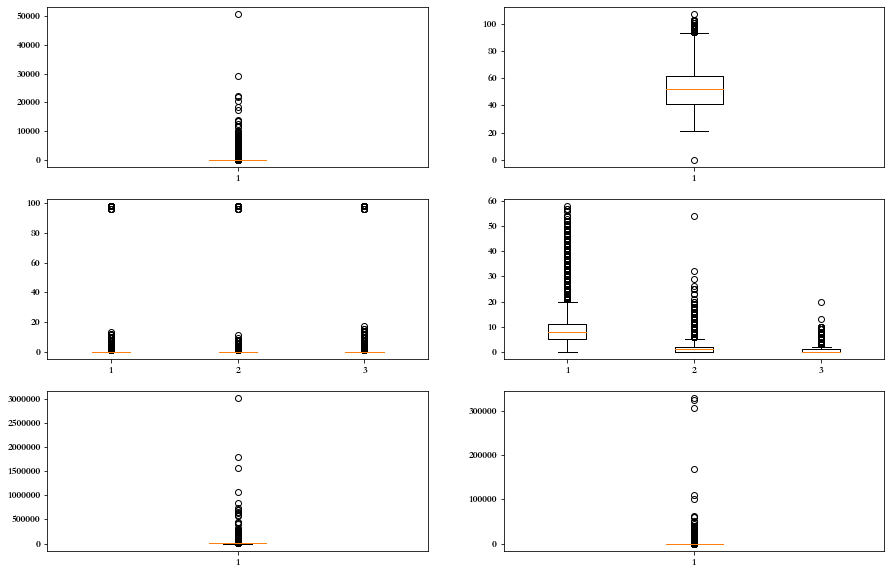

In [234]:
'''画箱线图，采用组合图的方式'''
#建立画板和画纸
fig=plt.figure(figsize=(15,10))
a=fig.add_subplot(3,2,1)
b=fig.add_subplot(3,2,2)
c=fig.add_subplot(3,2,3)
d=fig.add_subplot(3,2,4)
e=fig.add_subplot(3,2,5)
f=fig.add_subplot(3,2,6)

a.boxplot(train['可用额度比值'])
b.boxplot([train['年龄']])
c.boxplot([train['逾期30-59天笔数'],train['逾期60-89天笔数'],train['逾期90天笔数']])
d.boxplot([train['信贷数量'],train['固定资产贷款量'],train['家属数量']])
e.boxplot(train['月收入'])
f.boxplot(train['负债率'])

In [235]:
#分别去掉各变量的异常值
train=train[train['可用额度比值']<1.25]
train=train[train['年龄']<100]
train=train[train['逾期30-59天笔数']<80]
train=train[train['月收入']<50000]
train=train[train['逾期90天笔数']<80]
train=train[train['逾期60-89天笔数']<80]
train=train[train['家属数量']<20]


#去掉重复样本
train.drop_duplicates(inplace=True)
train.describe() 

,id,好坏客户,可用额度比值,年龄,逾期30-59天笔数,负债率,月收入,信贷数量,逾期90天笔数,固定资产贷款量,逾期60-89天笔数,家属数量
count,144611.000000,144611.000000,144611.000000,144611.000000,144611.000000,144611.000000,144611.000000,144611.000000,144611.000000,144611.000000,144611.000000,144611.000000
mean,75013.808853,0.064905,0.317214,52.162851,0.245452,334.966009,6418.097528,8.555200,0.086439,1.031104,0.062997,0.756208
std,43292.065365,0.246359,0.347348,14.589202,0.697743,1951.663544,4152.867824,5.138551,0.468254,1.122021,0.322819,1.113204
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37532.500000,0.000000,0.030537,41.000000,0.000000,0.173957,3830.000000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75020.000000,0.000000,0.155520,52.000000,0.000000,0.359238,6400.000000,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112484.500000,0.000000,0.548916,62.000000,0.000000,0.769355,7500.000000,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,1.249405,99.000000,13.000000,329664.000000,49750.000000,58.000000,17.000000,54.000000,11.000000,13.000000


### 2.3 探索性数据分析（EDA)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a4a496310>,
      dtype=object)

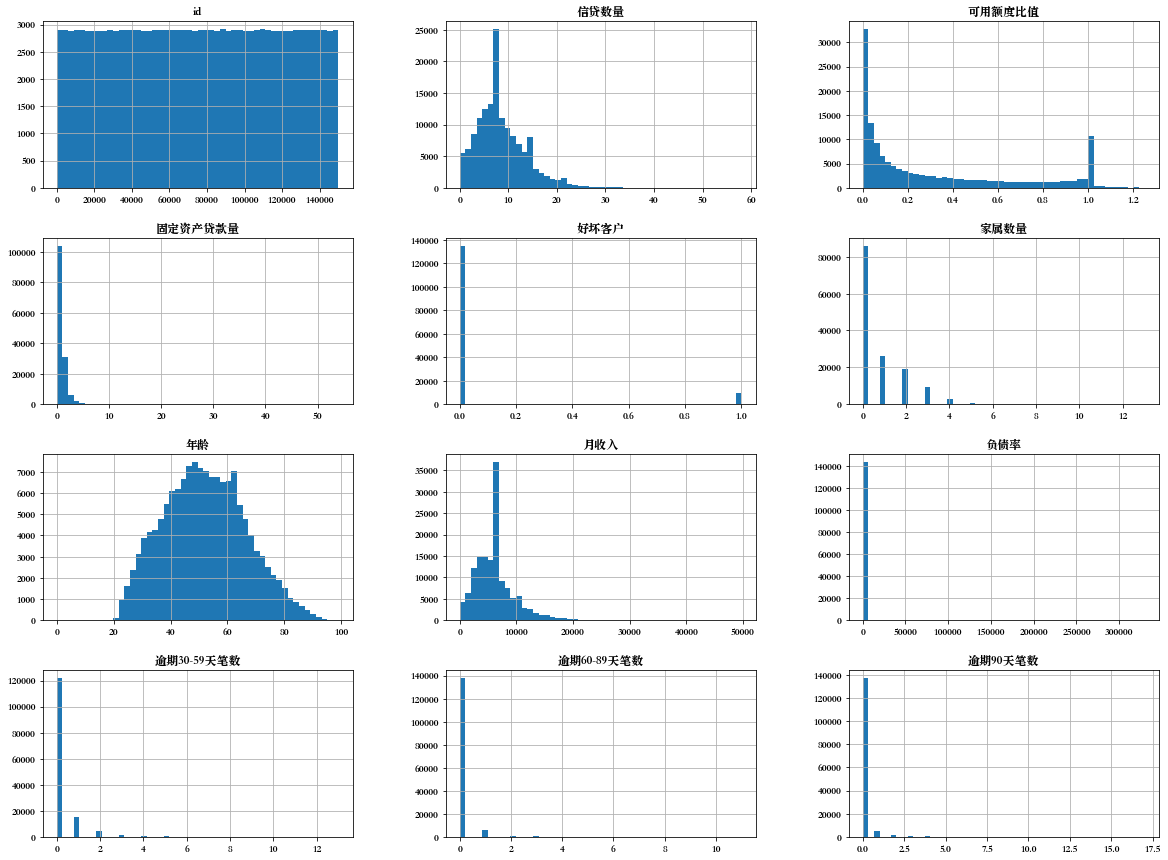

In [236]:
# 设置matplotlib正常显示中文和负号
matplotlib.rcParams['font.sans-serif']=['Songti SC']   # 用宋体显示中文
matplotlib.rcParams['axes.unicode_minus']=False     # 正常显示负号
train.hist(bins=50,figsize=(20,15))

### 2.4 变量选择

本项目其实主要目的是为了预测新样本为好/坏客户，训练集有标签标记，是有监督学习，一个二分类问题，可以采用logistic回归进行分类，为了训练处分类器，要进行自变量的选择，可以采用IV（Information Value 信息量）来判断选择，IV可以衡量自变量的预测能力，IV计算要以WOE（证据权重）为基础，WOE是对原始自变量的一种编码形式，要对一个变量进行WOE编码，需要首先把这个变量进行分组处理（也叫离散化、分箱等等），因此，对项目中的连续型变量进行分箱处理。
![替代文字](2-3.png)

#### 2.4.1 分箱处理
变量分箱（binning）是对连续变量离散化（discretization）的一种称呼。

信用评分卡开发中一般有常用的等距分段、等深分段、最优分段。

其中等距分段（Equval length intervals）是指分段的区间是一致的，比如年龄以十年作为一个分段；

等深分段（Equal frequency intervals）是先确定分段数量，然后令每个分段中数据数量大致相等；

最优分段（Optimal Binning）又叫监督离散化（supervised discretizaion），使用递归划分（Recursive Partitioning）将连续变量分为分段，背后是一种基于条件推断查找较佳分组的算法。



In [237]:
# 我们首先选择对连续变量进行最优分段，在连续变量的分布不满足最优分段的要求时，再考虑对连续变量进行等距分段。
# 其中可用额度比值，年龄，负债率和月收入为连续函数。
# 最优分箱的代码如下：
from scipy import stats #加载包 
#定义自动分箱函数，采用最优分段进行分箱
'''采用斯皮尔曼等级相关系数进行变量相关分析，该相关系数对两个变量划分等级在进行分析，[-1,1]，
当两个变量完全单调相关时，斯皮尔曼相关系数则为+1或−1'''

def op(Y, X, n = 20):
    r = 0
    good=Y.sum()
    bad=Y.count()-good
    while np.abs(r) < 1:
        d1 = pd.DataFrame({"X": X, "Y": Y, "Bucket": pd.qcut(X, n,duplicates="drop")}) 
        # 后面报错You can drop duplicate edges by setting the 'duplicates' kwarg，所以回到这里补充duplicates参数
        # pandas中使用qcut()，边界易出现重复值，如果为了删除重复值设置 duplicates=‘drop’，则易出现于分片个数少于指定个数的问题
        # 经尝试，设置duplicates参数为“drop”可行，而不能设置为“raise”。
        d2 = d1.groupby('Bucket', as_index = True)
        r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
        n = n - 1
    d3 = pd.DataFrame(d2.X.min(), columns = ['min'])
    d3['min']=d2.min().X
    d3['max'] = d2.max().X
    d3['sum'] = d2.sum().Y
    d3['total'] = d2.count().Y
    d3['rate'] = d2.mean().Y
    d3['woe']=np.log((d3['rate']/(1-d3['rate']))/(good/bad))
    d4 = (d3.sort_values(by = 'min')).reset_index(drop=True)
    print("=" * 60)
    print(d4)
    woe=list(d4['woe'].round(3))
    return d4

In [238]:
#利用所定义的函数依次对连续型变量进行最优分段分箱处理,满足条件的有以下
x1=op(train['好坏客户'],train['可用额度比值'])
x2=op(train['好坏客户'],train['年龄'])
x4=op(train['好坏客户'],train['负债率'])  
x5=op(train['好坏客户'],train['月收入'])

        min       max   sum  total      rate       woe
0  0.000000  0.030537   673  36153  0.018615 -1.297258
1  0.030538  0.155520   729  36153  0.020164 -1.215750
2  0.155526  0.548897  1792  36152  0.049568 -0.285840
3  0.548934  1.249405  6192  36153  0.171272  1.091082
    min  max   sum  total      rate       woe
0     0   30  1095  10093  0.108491  0.561473
1    31   34   845   8247  0.102462  0.497552
2    35   38   890   9516  0.093527  0.396406
3    39   41   792   9008  0.087922  0.328443
4    42   43   524   6167  0.084968  0.291041
5    44   46   814  10290  0.079106  0.213164
6    47   48   565   7342  0.076955  0.183257
7    49   50   568   7417  0.076581  0.177984
8    51   53   763  10567  0.072206  0.114433
9    54   55   434   6762  0.064182 -0.011974
10   56   58   525  10104  0.051960 -0.236209
11   59   61   464   9734  0.047668 -0.326933
12   62   63   281   7053  0.039841 -0.514476
13   64   66   246   7827  0.031430 -0.760348
14   67   70   202   8114  0.024895

In [239]:
#对于不能采用最优分段的变量采用等深分段

def funqcut(y,x,n):
    cut1=pd.qcut(x.rank(method='first'),n)  #进行等深分箱，分组
    
    data=pd.DataFrame({"x":x,"y":y,"cut1":cut1})
    cutbad=data.groupby(cut1).y.sum()   #求分组下的坏客户数
    cutgood=data.groupby(cut1).y.count()-cutbad #求分组下好客户数
    bad=data.y.sum() #求总的坏客户数
    good=data.y.count()-bad #求总的好客户数
    
    woe=np.log((cutbad/bad)/(cutgood/good)) #求各分组的woe
    iv=(cutbad/bad-cutgood/good)*woe  #求各分组的iv
    
    cut=pd.DataFrame({"坏客户数":cutbad,"好客户数":cutgood,"woe":woe,"iv":iv})
    print(cut)
    
    return cut#返回表格和对应分组列表

#funqcut(train['好坏客户'],train['年龄'],6).reset_index()
  
x3=funqcut(train['好坏客户'],train['逾期30-59天笔数'],5).reset_index()
x6=funqcut(train['好坏客户'],train['信贷数量'],6).reset_index()
x7=funqcut(train['好坏客户'],train['逾期90天笔数'],5).reset_index()
x8=funqcut(train['好坏客户'],train['固定资产贷款量'],5).reset_index() 
x9=funqcut(train['好坏客户'],train['逾期60-89天笔数'],5).reset_index()
x10=funqcut(train['好坏客户'],train['家属数量'],5).reset_index()

                      坏客户数   好客户数       woe        iv
逾期30-59天笔数                                           
(0.999, 28923.0]      1159  27764 -0.508462  0.041610
(28923.0, 57845.0]    1176  27746 -0.493252  0.039406
(57845.0, 86767.0]    1130  27792 -0.534810  0.045529
(86767.0, 115689.0]   1128  27794 -0.536653  0.045809
(115689.0, 144611.0]  4793  24129  1.051463  0.349315
                         坏客户数   好客户数       woe        iv
信贷数量                                                    
(0.999, 24102.667]       2283  21819  0.410430  0.033607
(24102.667, 48204.333]   1464  22638 -0.070737  0.000809
(48204.333, 72306.0]     1271  22831 -0.220594  0.007373
(72306.0, 96407.667]     1327  22774 -0.174978  0.004730
(96407.667, 120509.333]  1400  22702 -0.118260  0.002214
(120509.333, 144611.0]   1641  22461  0.051246  0.000448
                      坏客户数   好客户数       woe        iv
逾期90天笔数                                              
(0.999, 28923.0]      1294  27629 -0.393407  0.026143
(289

#### 2.4.2 WOE和IV值分析

前文已经把WOE值计算出来，可视化分析WOE值随着各变量变化情况,WoE分析， 是对指标分箱、计算各个档位的WoE值并观察WoE值随指标变化的趋势。

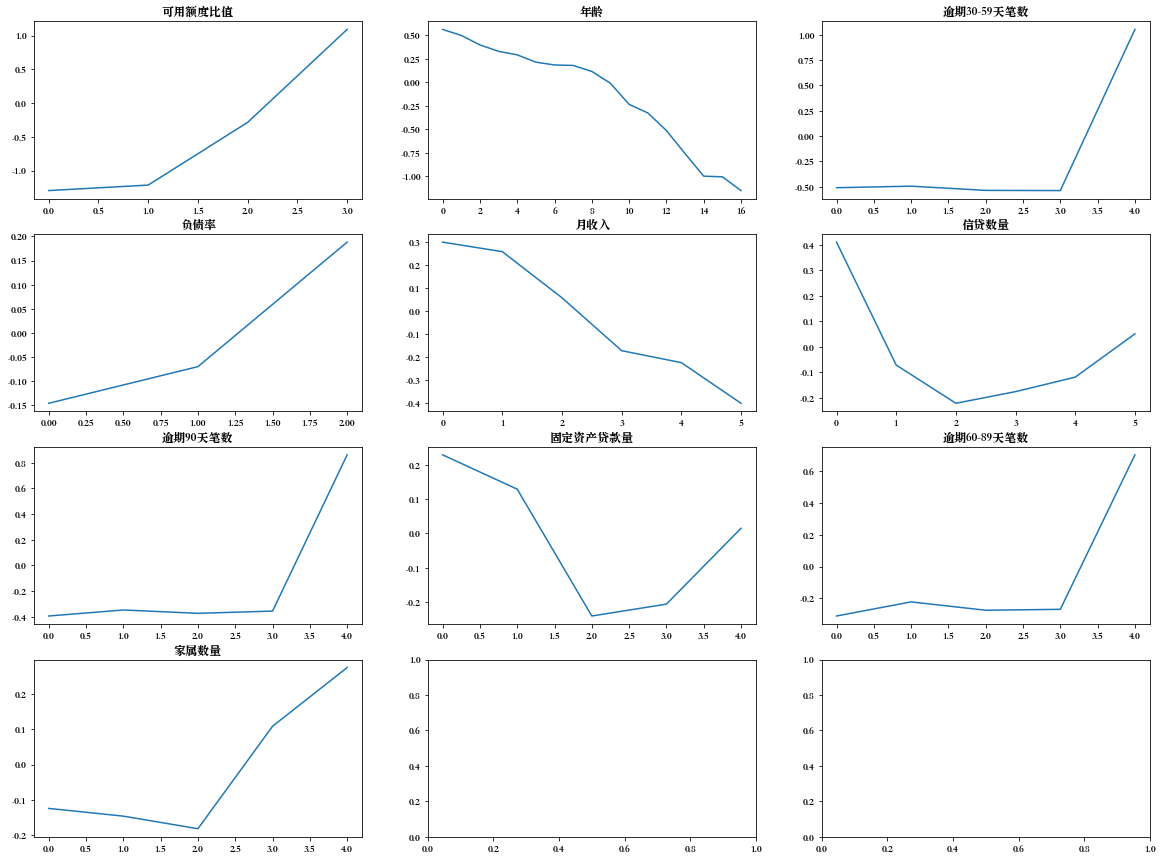

In [240]:
#画出各个变量的woe值变化情况
fig,axes=plt.subplots(4,3,figsize=(20,15))
x1.woe.plot(ax=axes[0,0],title="可用额度比值")
x2.woe.plot(ax=axes[0,1],title="年龄")
x3.woe.plot(ax=axes[0,2],title="逾期30-59天笔数")
x4.woe.plot(ax=axes[1,0],title="负债率")
x5.woe.plot(ax=axes[1,1],title="月收入")
x6.woe.plot(ax=axes[1,2],title="信贷数量")
x7.woe.plot(ax=axes[2,0],title="逾期90天笔数")
x8.woe.plot(ax=axes[2,1],title="固定资产贷款量")
x9.woe.plot(ax=axes[2,2],title="逾期60-89天笔数")
x10.woe.plot(ax=axes[3,0],title="家属数量")
plt.show()

上图为各指标与woe值的关系变化图，大部分都呈现单调变化，而固定资产贷款量和信贷数量大致呈先U型。

接下来，我进一步计算每个变量的Infomation Value（IV）。IV指标是一般用来确定自变量的预测能力。

![替代文字](2-4.png)

通过IV值判断变量预测能力的标准是：

< 0.02: unpredictive

0.02 to 0.1: weak

0.1 to 0.3: medium

0.3 to 0.5: strong

$>$ 0.5: suspicious

In [275]:
# IV的实现放在mono_bin()函数里面，代码实现如下：

# 定义自动分箱函数
def mono_bin(Y, X, n = 20):
    r = 0
    good=Y.sum()
    bad=Y.count()-good
    while np.abs(r) < 1:
        d1 = pd.DataFrame({"X": X, "Y": Y, "Bucket": pd.qcut(X, n,duplicates="drop")}) 
        # 后面报错You can drop duplicate edges by setting the 'duplicates' kwarg，所以回到这里补充duplicates参数
        # pandas中使用qcut()，边界易出现重复值，如果为了删除重复值设置 duplicates=‘drop’，则易出现于分片个数少于指定个数的问题
        # 经尝试，设置duplicates参数为“drop”可行，而不能设置为“raise”。
        d2 = d1.groupby('Bucket', as_index = True)
        r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
        n = n - 1
    d3 = pd.DataFrame(d2.X.min(), columns = ['min'])
    d3['min']=d2.min().X
    d3['max'] = d2.max().X
    d3['sum'] = d2.sum().Y
    d3['total'] = d2.count().Y
    d3['rate'] = d2.mean().Y
    d3['woe']=np.log((d3['rate']/(1-d3['rate']))/(good/bad))
    d3['goodattribute']=d3['sum']/good
    d3['badattribute']=(d3['total']-d3['sum'])/bad
    iv=((d3['goodattribute']-d3['badattribute'])*d3['woe']).sum()
    d4 = (d3.sort_values(by = 'min')).reset_index(drop=True)
    #print("=" * 60)
    #print(d4)
    cut=[]
    cut.append(float('-inf'))
    for i in range(1,n+1):
        qua=X.quantile(i/(n+1))
        cut.append(round(qua,4))
    cut.append(float('inf'))
    woe=list(d4['woe'].round(3))
    #return d4,iv,cut,woe 这里我们只需要iv
    return iv

In [276]:
ivx1= mono_bin(train['好坏客户'],train['可用额度比值'],n=10)
ivx2= mono_bin(train['好坏客户'],train['年龄'], n=10)
ivx4= mono_bin(train['好坏客户'],train['负债率'], n=20)
ivx5= mono_bin(train['好坏客户'],train['月收入'], n=10)
print (ivx1)
# 连续变量离散化
ivx3=x3.iv.sum()
ivx6=x6.iv.sum()
ivx7=x7.iv.sum()
ivx8=x8.iv.sum()
ivx9=x9.iv.sum()
ivx10=x10.iv.sum()

0.9675169222078509


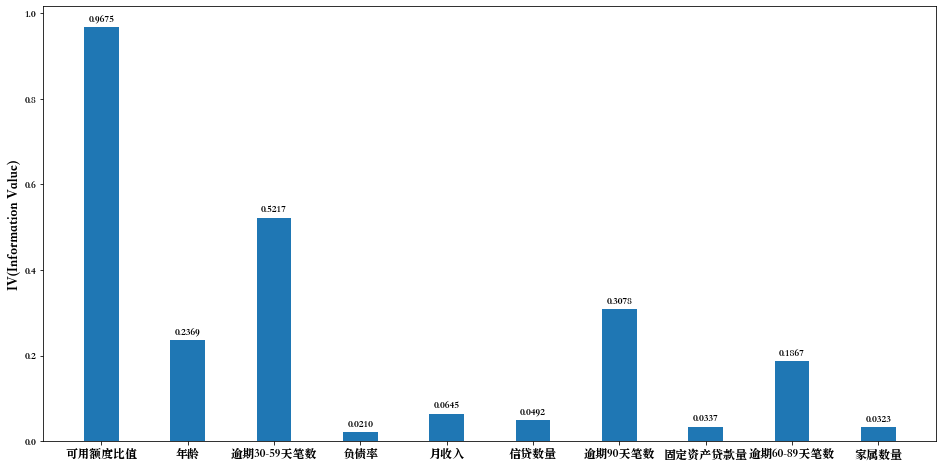

In [277]:
ivlist=[ivx1,ivx2,ivx3,ivx4,ivx5,ivx6,ivx7,ivx8,ivx9,ivx10]#各变量IV
index=['可用额度比值','年龄','逾期30-59天笔数','负债率','月收入','信贷数量','逾期90天笔数','固定资产贷款量',
       '逾期60-89天笔数','家属数量']#x轴的标签
fig1 = plt.figure(figsize = (16,8))
ax1 = fig1.add_subplot(1, 1, 1)
x = np.arange(len(index))+1
ax1.bar(x, ivlist, width=0.4)#生成柱状图
ax1.set_xticks(x)
ax1.set_xticklabels(index, rotation=0, fontsize=12)
ax1.set_ylabel('IV(Information Value)', fontsize=14)
#在柱状图上添加数字标签
for a, b in zip(x, ivlist):
    plt.text(a, b + 0.01, '%.4f' % b, ha='center', va='bottom', fontsize=10)
plt.show()

# 输出的各变量IV图，如下。
# 可以看出，负债率(x4)、月收入(x5)、信贷数量(x6)、固定资产贷款量(x8)和家属数量(x10)变量的IV值明显较低，所以予以删除。

### 2.5 模型开发

#### 2.5.1 WOE转换

证据权重（Weight of Evidence,WOE）转换可以将Logistic回归模型转变为标准评分卡格式。引入WOE转换的目的并不是为了提高模型质量，只是一些变量不应该被纳入模型，这或者是因为它们不能增加模型值，或者是因为与其模型相关系数有关的误差较大，其实建立标准信用评分卡也可以不采用WOE转换。这种情况下，Logistic回归模型需要处理更大数量的自变量。尽管这样会增加建模程序的复杂性，但最终得到的评分卡都是一样的。
在建立模型之前，我们需要将筛选后的变量转换为WoE值，便于信用评分。

In [278]:
#利用前文的等深分段分箱设定，将各个变量的分箱后情况保存为cut1,cut2，cut3...与所得到的分箱情况总结表相对应。其中采用x2/x4/x5采用最优分段的结果
def cutdata(x,n):
    a=pd.qcut(x.rank(method='first'),n,labels=False)#等深分组，label=False返回整数值（0,1,2,3...）对应第一类、第二类..
    return a
#连续变量均被等深分为了5类 

#应用函数，求出各变量分类情况 
cut1=cutdata(train['可用额度比值'],4)
cut2=cutdata(train['年龄'],17)
cut3=cutdata(train['逾期30-59天笔数'],5)
cut4=cutdata(train['负债率'],3)
cut5=cutdata(train['月收入'],5)
cut6=cutdata(train['信贷数量'],6)
cut7=cutdata(train['逾期90天笔数'],5)
cut8=cutdata(train['固定资产贷款量'],5)
cut9=cutdata(train['逾期60-89天笔数'],5)
cut10=cutdata(train['家属数量'],5)

cut1.head()

0    3
1    3
2    3
3    2
5    2
Name: 可用额度比值, dtype: int64

In [279]:
#依据变量值的分类替换成对应的woe值
def replace_train(cut,cut_woe):  #定义替换函数，cut为分组情况，cut_woe为分组对应woe值
    a=[]
    for i in cut.unique(): #unique为去重，保留唯一值
        a.append(i)
        a.sort()  #排序，默认小到大，得到类别列表并排序，实则为[0,1,2,3,4]
    for m in range(len(a)):
        cut.replace(a[m],cut_woe.values[m],inplace=True) #替换函数，把cut中旧数值a[m]即分类替换为对应woe,cut_woe中的woe也是从小到大排序，因此与a[m]对应，正如把cut中的0替换为woe值，没有改变cut的数值顺序
    return cut  #返回被替换后的列表

#应用上述函数进行数值替换，cut1,cut2...保存了变量分组，x1,x2..保存了woe、iv等值
train_new=pd.DataFrame() #创建新数据框保存替换后的新数据
train_new['好坏客户']=train['好坏客户']
train_new['可用额度比值']=replace_train(cut1,x1.woe)
train_new['年龄']=replace_train(cut2,x2.woe)
train_new['逾期30-59天笔数']=replace_train(cut3,x3.woe)
train_new['负债率']=replace_train(cut4,x4.woe)
train_new['月收入']=replace_train(cut5,x5.woe)
train_new['信贷数量']=replace_train(cut6,x6.woe)
train_new['逾期90天笔数']=replace_train(cut7,x7.woe)
train_new['固定资产贷款量']=replace_train(cut8,x8.woe)
train_new['逾期60-89天笔数']=replace_train(cut9,x9.woe)
train_new['家属数量']=replace_train(cut10,x10.woe)
train_new.head()

,好坏客户,可用额度比值,年龄,逾期30-59天笔数,负债率,月收入,信贷数量,逾期90天笔数,固定资产贷款量,逾期60-89天笔数,家属数量
0,1,1.091082,0.213164,1.051463,0.188061,-0.224685,-0.118260,-0.393407,0.015174,-0.310829,0.108047
1,0,1.091082,0.328443,-0.508462,-0.145507,0.300052,0.410430,-0.393407,0.230137,-0.310829,-0.181272
2,0,1.091082,0.396406,1.051463,-0.145507,0.300052,0.410430,0.860426,0.230137,-0.310829,-0.123984
3,0,-0.285840,0.561473,-0.508462,-0.145507,0.300052,-0.070737,-0.393407,0.230137,-0.310829,-0.123984
5,0,-0.285840,-1.007214,-0.508462,-0.069624,0.258555,0.410430,-0.393407,0.129642,-0.310829,-0.181272


#### 2.5.2 逻辑回归模型建立

In [282]:
from sklearn.linear_model import LogisticRegression  #导入logistic回归模块
from sklearn.model_selection import train_test_split #导入数据切分函数

#根据前文的变量选择分析，将负债率、月收入、信贷数量、固定资产贷款量、家属数量变量舍弃，不纳入模型中
train_new1=train_new.drop(["负债率","月收入","信贷数量","固定资产贷款量","家属数量"],axis=1)
train_new1.head()
x=train_new1.iloc[:,1:] #设定自变量
y=train_new.iloc[:,0] #设定因变量

#将数据集进行切割，分成训练集和测试集，其中样本占比0.8，采用随机抽样 
train_x,test_x,train_y,test_y=train_test_split(x,y,train_size=0.8,random_state=4)

#建立模型
model=LogisticRegression()
result=model.fit(train_x,train_y) #训练模型，将结果保存为result
pred_y=model.predict(test_x)  #预测测试集的y
result.score(test_x,test_y)    #计算预测精度 正确率

0.9388376032914981

### 2.6 模型评估

在分类模型评估中，最常用的两种评估标准是K-S值和AUC值，AUC值可以在样本不均衡的情况下准确评估模型的好坏，而K-S值不仅能够评估预测的准确与否，还能度量模型对好坏客户是否有足够的区分度。

![替代文字](3-1.png)

AUC（Area Under the ROC Curve）指标是在二分类问题中，模型评估阶段常被用作最重要的评估指标来衡量模型的稳定性。

根据混淆矩阵，我们可以得到另外两个指标：

真正例率，True Positive Rate：TPR = TP/ (TP+FN)

假正例率， False Postive Rate：FPR = FP/(TN+FP)

另外，真正率是正确预测到的正例数与实际正例数的比值，所以又称为灵敏度（敏感性，sensitive）；

对应于灵敏度有一个特异度（特效性，specificity）是正确预测到的负例数与实际负例数的比值（NPV = TN / (TN+FN)）。

我们以真正例率（TPR）作为纵轴，以假正例率（FPR）作为横轴作图，便得到了ROC曲线，而AUC则是ROC曲线下的面积。AUC的取值为[0.5-1]，0.5对应于对角线的“随机猜测模型”。

![替代文字](3-2.png)

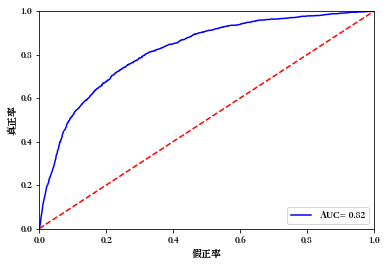

0.8186616165327648


In [285]:
#利用sklearn.metrics计算ROC和AUC值
from sklearn.metrics import  roc_curve, auc  #导入函数
proba_y=model.predict_proba(test_x)  #预测概率predict_proba：
'''返回的是一个n行k列的数组，第i行第j列上的数值是模型预测第i个预测样本的标签为j的概率，此时每一行的和应该等于1。'''
fpr,tpr,threshold=roc_curve(test_y,proba_y[:,1])  #计算threshold阈值，tpr真正例率，fpr假正例率，大于阈值的视为1即坏客户
roc_auc=auc(fpr,tpr)   #计算AUC值

plt.plot(fpr,tpr,'b',label= 'AUC= %0.2f' % roc_auc) #生成roc曲线
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('真正率')
plt.xlabel('假正率')
plt.show()
print(roc_auc)

![替代文字](3-3.png)

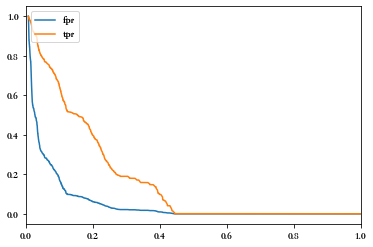

ks值为： 0.4893125128108575


In [287]:
#KS值
dataks=pd.DataFrame({"fpr":fpr,"tpr":tpr,"threshold":threshold})

dataks.head()
dataks=dataks.sort_values(["threshold"])
plt.plot(dataks.iloc[:,2],dataks['fpr'],label='fpr')
plt.plot(dataks.iloc[:,2],dataks['tpr'],label='tpr')
plt.xlim([0,1])
plt.legend(loc='upper left')
plt.show()
ks=max(tpr-fpr)
print("ks值为：",ks)

### 2.7 信用评分

将所构建的logistic模型转换位标准评分卡形式。依然参照：信用评分卡模型的理论准备
![替代文字](4-1.png)
![替代文字](4-2.png)
A为偏移量offset，B为比例因子factor，logistic回归中默认阈值等于0.5，即p=0.5，此时score=A，即评分阈值为A，p（违约率）越大，score越小，因此评分值小于A的应该判断为违约，评分值越低，违约率越高。

In [289]:
#假设比例即违约与正常比v为1/70,此时预期分值Z为700，PDD（比率翻倍的分数）为30
#B=PDD/log(2)
#A=Z+B*log(v)
#计算A、B
B=30/np.log(2)
A=700+B*np.log(1/70)

#计算基础分值A-BP0，参考上文
c=result.intercept_ #输出logistic模型的截距项
coef=result.coef_   #输出回归参数
BaseScore=A-B*c    #计算基础分值
BaseScore

array([630.71273052])

In [290]:
#计算各个变量各分组的分值B*coef*woe
def get_score(x,coef,B):
    score=[]
    for w in x.woe:
        a=round(B*coef*w,0)#四舍五入返回整数
        score.append(a)
    datascore=pd.DataFrame({"分组":x.iloc[:,0],"得分":score})
    return datascore

'''由前文可知，模型采用的自变量有 可用额度比值x1、年龄x2、逾期30-59天笔数x3、逾期90天笔数x7、逾期60-89天笔数x9'''

#应用函数，计算各个变量的评分
scorex1=get_score(x1,coef[0][0],B)
scorex2=get_score(x2,coef[0][1],B)
scorex3=get_score(x3,coef[0][2],B)
scorex7=get_score(x7,coef[0][3],B)
scorex9=get_score(x9,coef[0][4],B)

display("可用额度比值",scorex1)
display("年龄",scorex2)
display("逾期30-59天笔数",scorex3)
display("逾期90天笔数",scorex7)
display("逾期60-89天笔数",scorex9)
print("基础分值为：",BaseScore)

'可用额度比值'

,分组,得分
0,0.000000,-47.0
1,0.030538,-44.0
2,0.155526,-10.0
3,0.548934,39.0


'年龄'

,分组,得分
0,0,13.0
1,31,12.0
2,35,9.0
3,39,8.0
4,42,7.0
5,44,5.0
6,47,4.0
7,49,4.0
8,51,3.0
9,54,-0.0


'逾期30-59天笔数'

,分组,得分
0,"(0.999, 28923.0]",-14.0
1,"(28923.0, 57845.0]",-14.0
2,"(57845.0, 86767.0]",-15.0
3,"(86767.0, 115689.0]",-15.0
4,"(115689.0, 144611.0]",29.0


'逾期90天笔数'

,分组,得分
0,"(0.999, 28923.0]",-11.0
1,"(28923.0, 57845.0]",-9.0
2,"(57845.0, 86767.0]",-10.0
3,"(86767.0, 115689.0]",-10.0
4,"(115689.0, 144611.0]",23.0


'逾期60-89天笔数'

,分组,得分
0,"(0.999, 28923.0]",0.0
1,"(28923.0, 57845.0]",0.0
2,"(57845.0, 86767.0]",0.0
3,"(86767.0, 115689.0]",0.0
4,"(115689.0, 144611.0]",-1.0


基础分值为： [630.71273052]
